In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import datetime

In [2]:
filename = input("請輸入欲分析文檔名，包含副檔名(.xlsx)：")

請輸入欲分析文檔名，包含副檔名(.xlsx)：1106_DataMerge.xlsx


In [3]:
s = input('輸入公司代碼：') #改成四碼即可

輸入公司代碼：2837


In [4]:
def cparser(string):
    return string[:4]

def parser(string):
    s = ""
    k = 0
    while k < len(string) - 1 and string[k] != '_':
        s += string[k]
        k += 1
    return s

df = pd.read_excel(filename) #讀檔案
df['小事件類別'] = df['小事件類別'].map(parser) #先處理小事件類別：只剩代碼
df['公司'] = df['公司'].map(cparser) #公司也只剩代碼
# df.head()

types = []
for item in df.loc[:,'小事件類別']:
    if item not in types:
        types.append(item) #先看看總共有哪些小事件類別
        
type_vector = (sorted(types)) #排序小事件類別
# print(type_vector)

def location(string):
    return type_vector.index(string) #回傳小事件類別在向量中位置的函數


dftry = df[df['公司'] == s] #切片：切出目標公司

profile = [] #用來存小事件的向量
for year in range(19):
    if year < 10:
        mask = (dftry['事件日'] >= '200'+str(year)+'-1-1') & (dftry['事件日'] <= '200'+str(year)+'-12-31')
        vector = [0]*len(type_vector)
        for event in dftry.loc[mask].loc[:,'小事件類別']:
            for i in range(len(type_vector)):
                if event == type_vector[i]:
                    vector[i] += 1
        profile.append(vector)
    else:
        mask = (dftry['事件日'] >= '20'+str(year)+'-1-1') & (dftry['事件日'] <= '20'+str(year)+'-12-31')
        vector = [0]*len(type_vector)
        for event in dftry.loc[mask].loc[:,'小事件類別']:
            for i in range(len(type_vector)):
                if event == type_vector[i]:
                    vector[i] += 1
        profile.append(vector)
# print(profile)

data = pd.DataFrame(profile, columns=type_vector)
correlations = data.corr()

year_vector = [] #年向量
for year in range(19):
    if year < 10:
        year_vector.append('200' + str(year))
    else:
        year_vector.append('20' + str(year))
        
event_occur_by_year = pd.DataFrame(profile, columns=type_vector, index=year_vector)
# 整理出每年每種小事件發生幾次的矩陣
# print(event_occur_by_year)

event_T = event_occur_by_year.transpose() #轉置

draw_list = [] #用來畫圖的
for i in range(35):
    for j in range(19):
        test = event_T.iloc[i,j]
        if test != 0:
            draw_list.append([list(event_T.index)[i], list(event_T)[j], test])
            
draw_df = pd.DataFrame(draw_list, columns=['event','year','size']) #設定顏色
draw_df["color"] = "" 
for i in range(len(draw_df.index)):
    data = draw_df.iloc[i , 0]
    if data[0] == 'A':
        draw_df.iloc[i, 3] = ['blue']
    if data[0] == 'F':
        draw_df.iloc[i, 3] = ['orange']
    if data[0] == 'I':
        draw_df.iloc[i, 3] = ['black']
    if data[0] == 'M':
        draw_df.iloc[i, 3] = ['green']
    if data[0] == 'R':
        draw_df.iloc[i, 3] = ['red']        
    if data[:2] == '4B':
        draw_df.iloc[i, 3] = ['gray']
    if data[:2] == '7B':
        draw_df.iloc[i, 3] = ['purple']
        
# dicty = {'4B':1, '7B':2, 'AF02':3, 'AF06':4, 'AI01':5, 'AI02':6, 'AI03':7, 'FS01':8, 'FS02':9, 
# 'FS03':10, 'IF01':11, 'IF02':12, 'IH02':13, 'IL01':14, 'IP03':15, 'IS01':16, 'IS02':17, 'IS03':18, 
# 'MC01':19, 'MC03':20, 'MO01':21, 'MO04':22, 'MO05':23, 'MO06':24, 'MT02':25, 'MT04':26, 'MT05':27, 
# 'MT06':28, 'RB04':29, 'RB07':30, 'RB10':31, 'RB13':32, 'RD02':33, 'RD06':34, 'RD07':35}

draw_df["y"] = ""

for i in range(len(draw_df.index)):
    data = draw_df.iloc[i , 0]
    draw_df.iloc[i, 4] = location(data)
    
draw_df["x"] = ""

for i in range(len(draw_df.index)):
    data = draw_df.iloc[i , 1]
    draw_df.iloc[i, 5] = [int(data)]

corr1 = correlations.dropna(how='all', axis=1)
corr1 = corr1.dropna(how='all', axis=0)

# list(corr1.columns.values)

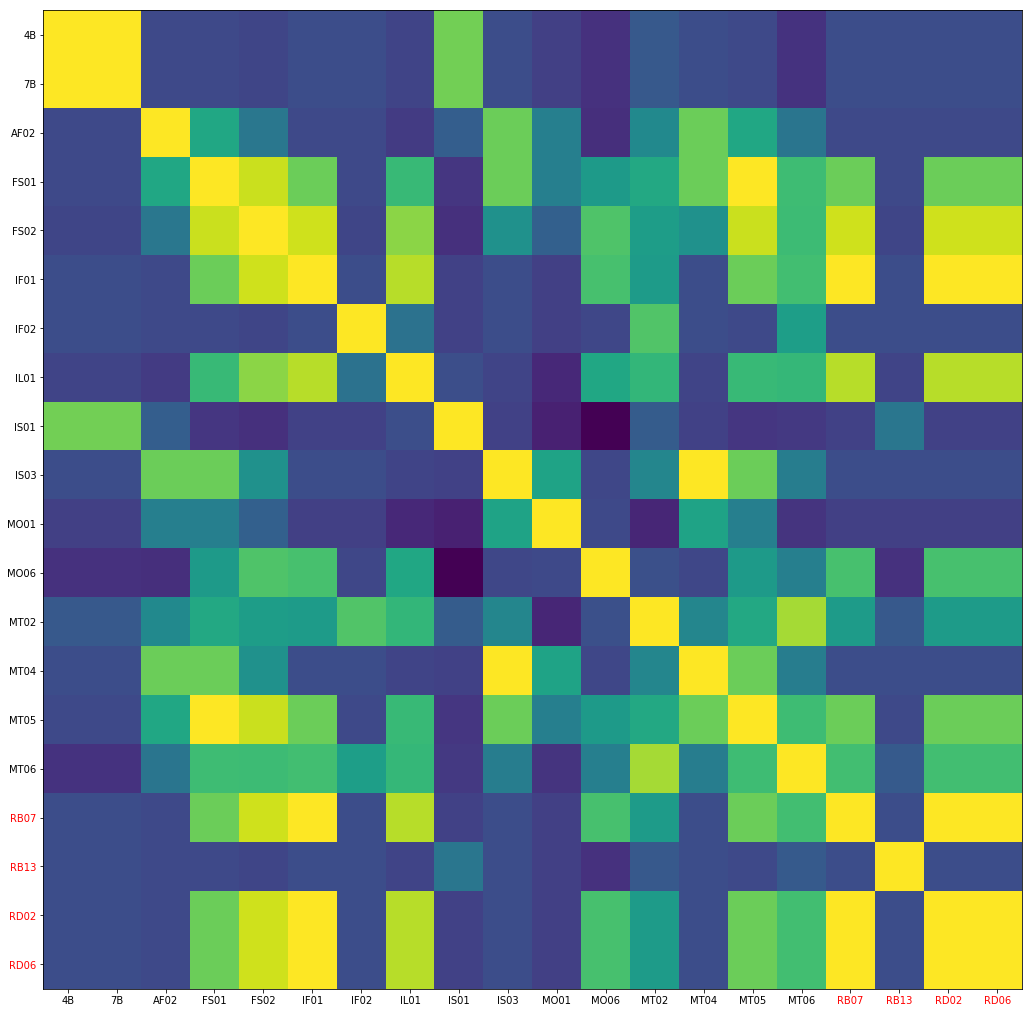

In [5]:
fig, ax = plt.subplots(figsize=(18,18))  #設定圖片大小
im = ax.imshow(corr1)  #畫熱點圖

# corr1 = data.corr()
# We want to show all ticks...
ax.set_xticks(np.arange(len(list(corr1.columns.values))))
ax.set_yticks(np.arange(len(list(corr1.columns.values))))
# ... and label them with the respective list entries
ax.set_xticklabels(list(corr1.columns.values))
# plt.gca().get_xticklabels()[-6:].set_color("red")
ax.set_yticklabels(list(corr1.columns.values))
# plt.gca().get_yticklabels()[-6:].set_color("red")

i = 0
while i <= len(list(corr1.columns.values)) and list(corr1.columns.values)[i][0] != 'R':
    i += 1
#     print(i)
    
if i < len(list(corr1.columns.values)):
    for j in range(0-(len(list(corr1.columns.values)))+i,0):
        plt.gca().get_xticklabels()[j].set_color("red")
        plt.gca().get_yticklabels()[j].set_color("red")


# cax = ax.matshow(corr1, vmin=-1, vmax=1)
# fig.colorbar(cax)


plt.show()

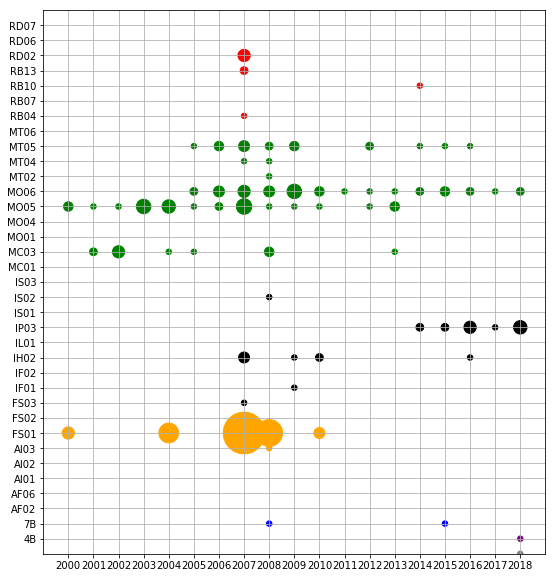

In [6]:
plt.figure(figsize=(9,10))

plt.xlim((1999,2019))
plt.ylim((0,36))

plt.xticks(np.arange(2000,2019), year_vector)
plt.yticks(np.arange(1,36), type_vector)

plt.grid()

plt.scatter(x=draw_df['x'], y=draw_df['y'], s=draw_df['size']*30, c= draw_df['color'])